In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
le = files.upload()

Saving LifeExpectancy.csv to LifeExpectancy.csv


In [4]:
df = pd.read_csv("LifeExpectancy.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

Data Cleaning

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
# Rename columns because they contain spaces
df.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [9]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [10]:
df['Country'].nunique()

193

In [11]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [12]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [13]:
df['Status'].nunique()

2

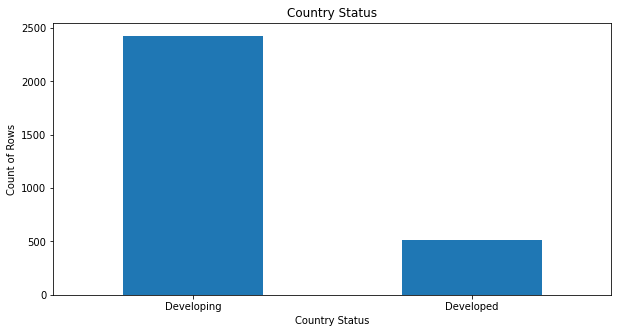

In [14]:
plt.figure(figsize=(10, 5))
df['Status'].value_counts().plot(kind='bar')
plt.title('Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)
plt.show()

In [15]:
df['Life_Expectancy'].unique() #Contains nan values

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

In [16]:
df['Life_Expectancy'].fillna(df['Life_Expectancy'].mean(), inplace=True)

In [17]:
df['Adult_Mortality'].unique()  #Contains nan values

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

In [18]:
df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean(), inplace=True)

In [19]:
df['Infant_Deaths'].unique()

array([  62,   64,   66,   69,   71,   74,   77,   80,   82,   84,   85,
         87,   88,    0,    1,   21,   20,   19,   67,   72,   75,   78,
         81,   90,   92,   94,   95,   96,   97,    8,    9,   10,   11,
         12,    5,    6,    7,   98,  104,  111,  118,  126,  135,  144,
        154,  164,  174,  185,  196,  207,  219,  231,   25,   13,   14,
         15,    2,   42,   44,   46,   49,   51,   54,   57,   61,   65,
         70,  103,   38,   39,   40,   41,   43,   45,   47,   48,   22,
         23,   24,   58,   59,   60,   63,   16,   17,   18,   27,   50,
         53,   56,  157,  171,  201,  215,  248,  266,  285,  307,  332,
        360,  391,  422,  457,  490,  236,  237,  238,  239,  235,  233,
        232,  229,  227,  226,   55,    3,    4,  136,  140,  145,  150,
        156,  162,  169,  177,  186,  206,  217,  228,  246,  253,   37,
         26,   28,   29,   30,   31,   32,   33,   34,   35,   36,  910,
        957, 1000, 1100, 1200, 1300, 1400, 1500, 16

In [20]:
df['Alcohol'].unique()

array([0.01, 0.03, 0.02, ..., 2.44, 3.56, 4.57])

In [21]:
df['Alcohol'].isna().sum()

194

In [22]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)

In [23]:
df['Percentage_Exp'].unique()

array([71.27962362, 73.52358168, 73.21924272, ..., 29.81456607,
       34.26216876,  8.7174087 ])

In [24]:
df['HepatitisB'].unique() #Contains nan values

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

In [25]:
df['HepatitisB'].fillna(df['HepatitisB'].mean(), inplace=True)

In [26]:
df['Measles'].unique()

array([  1154,    492,    430,   2787,   3013,   1989,   2861,   1599,
         1141,   1990,   1296,    466,    798,   2486,   8762,   6532,
            0,      9,     28,     10,     22,     68,      6,      7,
            8,     16,     18,    662,     63,     25,    112,    103,
          107,    217,    944,   2302,   3289,  15374,   5862,   2686,
          118,  11699,   8523,   4458,   1449,   1190,   2807,    265,
         1014,    765,    258,     29,   1196,  11945,   9046,   2219,
            1,      2,      3,     17,     33,     13,    137,   2281,
         1783,      4,     40,     69,     15,     74,    340,    158,
          199,    190,     70,    104,     65,     11,     91,     32,
          141,    108,    309,    117,     36,     52,     49,    448,
           20,     23,     90,    164,      5,    222,   1238,    827,
         1978,   4353,    574,    210,     46,     12,    240,    289,
          237,   1986,   5625,    788,    718,   2660,   2924,   6192,
      

In [27]:
df['BMI'].unique()

array([19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16.2, 15.7, 15.2, 14.7, 14.2,
       13.8, 13.4, 13. , 12.6, 12.2, 58. , 57.2, 56.5, 55.8, 55.1, 54.3,
       53.5, 52.6, 51.7,  5.8, 49.9, 48.9, 47.9, 46.9, 46. , 45. , 59.5,
       58.4, 56.1, 55. , 53.9, 52.8, 51.8, 49.8, 47. , 46.1, 45.3, 44.4,
       23.3, 22.7, 22.1, 21.5, 21. ,  2.4, 19.8, 19.3, 18.8, 18.2, 17.7,
       16.8, 16.3, 15.8, 15.4, 47.7, 46.4, 45.7, 45.1, 43.8, 43.2, 42.6,
       42. , 41.4,  4.8,  4.1, 39.5, 38.9, 38.2, 62.8, 62.2, 61.6, 61. ,
        6.4, 59.8, 59.2, 58.6, 57.5, 56.9, 56.3, 55.7, 54.6, 54. , 54.9,
       54.1, 53.3, 51.9, 51.2,  5.7,  5.1, 49.7, 49.2, 48.8, 48.4, 48.1,
       47.8, 47.4, 47.1, 66.6, 66.1, 65.5, 65. , 64.4, 63.9, 63.4, 62.9,
       62.5, 62. , 61.5,  6.9,  6.3, 59.6, 59. , 58.2, 57.6, 57.1, 56.6,
       55.2, 54.7, 54.2, 53.7, 53.2, 52.7, 52.2,  5.6, 52.5, 51.5, 48. ,
       47.3, 46.6, 45.9, 44.7, 44.2, 43.6, 43.1, 42.1, 64.5, 63.8, 63.2,
       62.6, 61.3,  6.7,  6.1, 59.4, 58.7, 58.1, 57

In [28]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [29]:
df['Under_Five_Deaths'].unique()

array([  83,   86,   89,   93,   97,  102,  106,  110,  113,  116,  118,
        120,  122,    0,    1,   24,   23,   22,   25,   98,  101,  105,
        115,  121,  127,  133,  138,  143,  148,  152,  155,  157,  159,
        160,    9,   10,   11,   12,   13,   14,    2,    6,    7,    8,
        130,  139,  150,  161,  173,  186,  201,  215,  231,  247,  264,
        280,  298,  316,   39,   40,   15,   16,   17,   18,   19,   20,
          3,    4,   47,   49,   52,   54,   57,   61,   64,   68,   73,
         79,   85,  100,  109,   63,   66,   71,   74,   77,   80,   91,
         92,   31,   32,   33,   34,   35,   36,   37,   38,   41,   81,
         82,   84,   87,   90,   94,   95,   21,   26,   29,   76,   99,
         78,   75,  183,  198,  216,  233,  251,  268,  288,  308,  332,
        360,  392,  427,  467,  511,  558,  608,  312,  314,  317,  319,
        321,  323,  324,  326,  327,  329,  330,  331,   60,   62,   65,
         70,   72,    5,  194,  202,  211,  221,  2

In [30]:
df['Polio'].unique()

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

In [31]:
df['Polio'].fillna(df['Polio'].mean(), inplace=True)

In [32]:
df['Tot_Exp'].unique()

array([ 8.16,  8.18,  8.13,  8.52,  7.87,  9.2 ,  9.42,  8.33,  6.73,
        7.43,  8.7 ,  8.79,  8.82,  7.76,  7.8 ,  8.2 ,  6.  ,  5.88,
        5.66,  5.59,  5.71,  5.34,  5.79,  5.87,  6.1 ,  5.86,  6.12,
        6.38,  6.27,  6.3 ,  6.26,   nan,  7.21,  7.12,  6.14,  5.29,
        5.12,  5.36,  4.2 ,  3.82,  3.36,  3.24,  3.54,  3.6 ,  3.73,
        3.84,  3.49,  3.31,  4.26,  3.3 ,  3.38,  3.39,  4.37,  4.54,
        4.1 ,  4.71,  4.41,  3.63,  5.38,  2.79,  5.54,  5.33,  5.39,
        5.65,  5.63,  4.86,  4.69,  4.27,  4.34,  4.21,  4.53,  4.48,
        4.13,  4.79,  4.99,  5.2 ,  5.89,  6.55,  7.63,  6.66,  6.49,
        6.68,  6.85,  6.84,  8.22,  8.31,  9.38,  9.21,  4.55,  3.71,
        4.56,  3.8 ,  4.31,  4.58,  5.25,  5.5 ,  5.56,  5.4 ,  5.94,
        6.25,  9.36,  9.5 ,  8.78,  8.53,  8.49,  8.45,  8.57,  8.32,
        8.39,  8.8 , 11.21, 11.14, 11.17,  1.94, 11.19,  1.6 ,  1.4 ,
        1.35,  1.53,  1.56,  1.48,  1.27,  1.12,  6.4 ,  5.37,  5.1 ,
        5.85,  6.17,

In [33]:
df['Tot_Exp'].fillna(df['Tot_Exp'].mean(), inplace=True)

In [34]:
df['Diphtheria'].unique()

array([65., 62., 64., 67., 68., 66., 63., 58.,  5., 41., 36., 33., 24.,
       99., 98., 97., 95., 93., 88., 86., 87., 89., 77., 75., 71.,  6.,
       69., 73., 34., 38.,  4., 28., 94., 91., 96., 83.,  9., 92., 85.,
       84., 81., 79., 78., 76., 82.,  8., 74.,  7., 72., 45., 61., 54.,
       59., 47., 23., 42., 48., 51., 44., 37., 46., 39., 19., 25., 21.,
       26., 31., 56.,  3., 53., 16.,  2., 43., 35., 32., 57., 49., 55.,
       52., nan, 29., 27.])

In [35]:
df['Diphtheria'].fillna(df['Diphtheria'].mean(), inplace=True)

In [36]:
df['HIV/AIDS'].unique()

array([ 0.1,  1.9,  2. ,  2.3,  2.6,  2.5,  2.4,  2.1,  0.2,  0.4,  0.8,
        0.7,  0.9,  0.5,  0.3,  0.6,  1.5,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.6,  1.8,  2.2,  2.8,  4.4,  5.5,  6.2,  9. , 12.7, 13.4, 14.4,
       20.6, 28.4, 31.9, 34.6, 37.2, 38.8,  1.7,  2.9,  3.2,  3.6,  4. ,
        3.4,  3.8,  4.3,  4.8,  5.1,  5.2,  5.3,  3.3,  3.7,  4.1,  5.8,
        6.1,  6.5,  6.7,  6.9,  7. ,  7.1,  3.5,  4.6,  4.9,  6.3,  7.2,
        7.4,  7.5,  7.7,  7.8,  7.9,  4.5,  6.6,  7.3,  8.3, 10. , 11.2,
       12. , 12.8, 13.9, 14.3,  3.1,  3.9,  4.7,  5. ,  3. ,  5.9,  6.8,
        7.6,  2.7,  4.2,  5.7,  8.2,  6. ,  8. ,  8.9, 10.7, 10.9, 11.1,
       11. , 10.1,  9.5,  5.6,  5.4,  6.4,  9.1, 10.3, 11.6, 13.2, 14.5,
       15.7, 16.9, 18.1,  9.3,  9.4,  9.6, 10.5, 18.2, 27.3, 30. , 34.1,
       34.8, 33.8, 32.5, 31.2, 29.8, 13.7, 14.9, 19.3, 21.1, 22.4, 23.4,
       24.2, 24.7, 25.1, 25.5, 10.8, 11.3, 12.6, 14.1, 16.3, 16.2, 15.9,
       15.3, 12.2,  8.7, 11.7, 15.2, 19.2, 22.1, 24

In [37]:
df['GDP'].unique()

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

In [38]:
df['GDP'].fillna(df['GDP'].mean(), inplace=True)

In [39]:
df['Population'].unique()

array([33736494.,   327582., 31731688., ...,   125525., 12366165.,
       12222251.])

In [40]:
df['Population'].fillna(df['Population'].mean(), inplace=True)

In [41]:
df['thinness_1to19_years'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  0.1,
        4.9,  5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8,
       26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27

In [42]:
df['thinness_1to19_years'].fillna(df['thinness_1to19_years'].mean(), inplace=True)

In [43]:
df['thinness_5to9_years'].unique()

array([17.3, 17.5, 17.7, 18. , 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5,
       19.7, 19.9,  2.2,  2.4,  2.5,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
        1.9,  2. ,  2.1,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  8.2,
        8.3,  8.5,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.7,  9.9,  1.1,
        3.3,  3.4,  3.5,  3.6,  0.9,  1. ,  0.6,  0.7,  2.9,  2.8,  3. ,
        3.1,  2.6, 18.3, 18.6, 18.8, 19. , 19.2, 19.4,  2.3,  2.7, 21.1,
       21.3, 21.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  0.8,  6.8,  6.9,
        7.1,  7.3,  7.5,  7.6,  7.8,  8. ,  8.4, 16. , 16.2, 16.5, 16.7,
       17. , 17.8, 18.1, 19.6,  1.2,  3.2,  6.7,  7. ,  7.4, 11.3, 11.8,
       12.2,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  7.7,  7.9,  8.1,
        9.1,  9.3,  9.8, 11.1,  7.2,  8.7,  8.9,  6.6,  9.5, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.9,  6.5,  0.5,  0.4,  4.3,  4.4,  4.6,
        4.7,  4.9,  5. ,  0.1, 12.1, 12.3,  4.5,  4.8, 27.3, 27.4, 27.5,
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28

In [44]:
df['thinness_5to9_years'].fillna(df['thinness_5to9_years'].mean(), inplace=True)

In [45]:
df['Income_Comp_Of_Resources'].unique()

array([0.479, 0.476, 0.47 , 0.463, 0.454, 0.448, 0.434, 0.433, 0.415,
       0.405, 0.396, 0.381, 0.373, 0.341, 0.34 , 0.338, 0.762, 0.761,
       0.759, 0.752, 0.738, 0.725, 0.721, 0.713, 0.703, 0.696, 0.685,
       0.681, 0.674, 0.67 , 0.662, 0.656, 0.743, 0.741, 0.737, 0.732,
       0.724, 0.714, 0.705, 0.697, 0.69 , 0.686, 0.68 , 0.673, 0.663,
       0.653, 0.644, 0.636, 0.531, 0.527, 0.523, 0.508, 0.495, 0.488,
       0.48 , 0.468, 0.439, 0.426, 0.406, 0.401, 0.391, 0.382, 0.784,
       0.782, 0.781, 0.778, 0.783, 0.788, 0.786, 0.773, 0.   , 0.826,
       0.825, 0.823, 0.822, 0.816, 0.802, 0.794, 0.792, 0.78 , 0.775,
       0.77 , 0.776, 0.771, 0.764, 0.739, 0.736, 0.729, 0.72 , 0.707,
       0.692, 0.679, 0.668, 0.657, 0.645, 0.639, 0.937, 0.936, 0.933,
       0.93 , 0.927, 0.925, 0.921, 0.918, 0.915, 0.91 , 0.908, 0.905,
       0.902, 0.899, 0.897, 0.892, 0.887, 0.884, 0.88 , 0.872, 0.87 ,
       0.864, 0.86 , 0.854, 0.848, 0.841, 0.837, 0.847, 0.833, 0.758,
       0.745, 0.742,

In [46]:
df['Income_Comp_Of_Resources'].fillna(df['Income_Comp_Of_Resources'].mean(), inplace=True)

In [47]:
df['Schooling'].unique()

array([10.1, 10. ,  9.9,  9.8,  9.5,  9.2,  8.9,  8.7,  8.4,  8.1,  7.9,
        6.8,  6.5,  6.2,  5.9,  5.5, 14.2, 13.3, 12.5, 12.2, 12. , 11.6,
       11.4, 10.8, 10.9, 10.7, 10.6, 14.4, 14. , 13.6, 13.1, 12.6, 12.3,
       11.7, 11.5, 11.1, 10.3,  9.4,  9. ,  8.5,  7.7,  7.2,  6.4,  5.1,
        4.6, 13.9, 13.8, 14.1, 14.5, 14.7,  0. , 17.3, 17.2, 17.1, 16.8,
       16.5, 16.3, 16.1, 16.4, 15.6, 15. , 12.7, 11.9, 11.2, 20.4, 20.3,
       20.1, 19.8, 19.5, 19.1, 19. , 20.7, 20.6, 20.5, 15.9, 15.7, 15.4,
       15.3, 15.1, 15.2, 14.9, 15.5, 11.8, 11. , 10.4, 12.4, 12.1, 13.7,
       13.5, 13.2, 10.2,  8.6,  8.2,  7.5,  7.3, 15.8, 14.8, 14.6, 16.6,
       16.2, 18.8, 18.6, 18.2, 18. , 12.8, 12.9,  9.3,  9.1,  6.6, 10.5,
        9.6,  8.8,  8. ,  7.6, 14.3, 13.4,  6.7,  6.3,  5.4,  4.9,  4.7,
        4.3,  3.9,  3.8,  3.6,  3.5,  3.4,  5.6,  5.2,  4.4,  4.5,  nan,
       11.3,  9.7,  8.3,  7.1,  6.9,  6. ,  5.7,  5.3, 13. , 17.6, 17.7,
       16. , 19.2, 18.7, 18.4, 16.9, 16.7,  5. ,  4

In [48]:
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

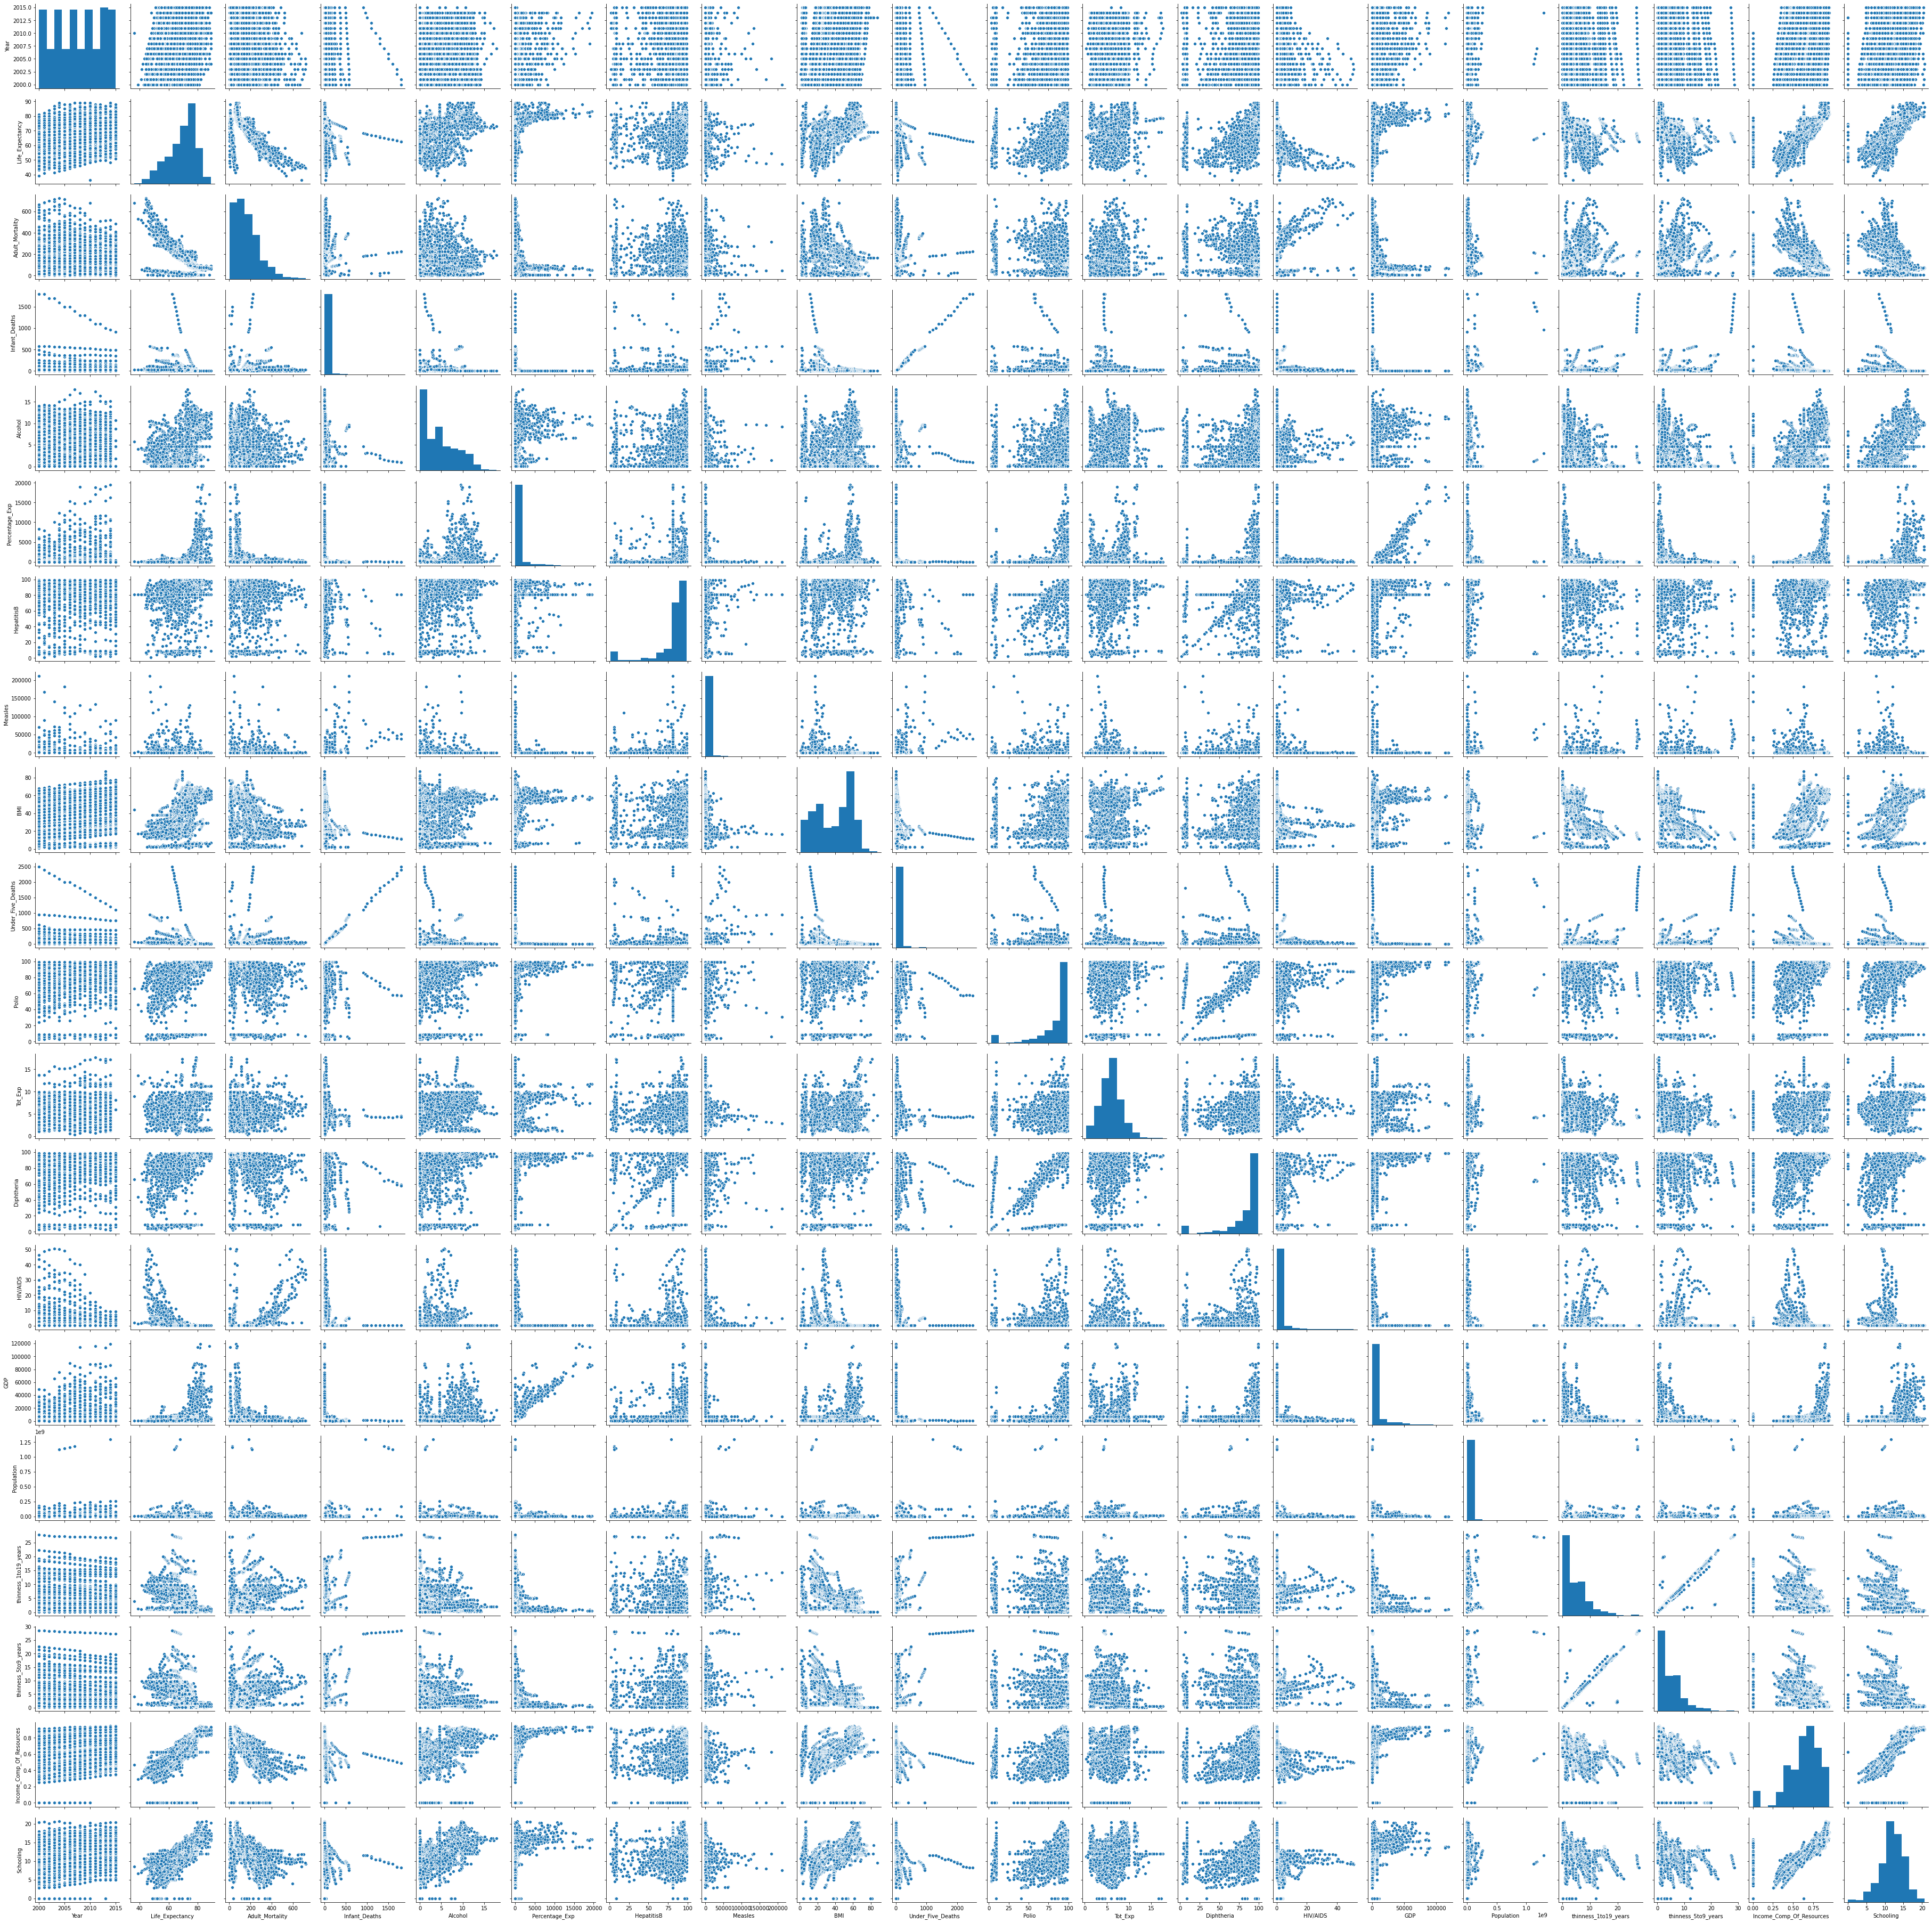

In [49]:
#1. Check multicolinearity - multicolinarity exists # infant deaths and under_5_deaths are multicolinear
sns.pairplot(df)
plt.show()

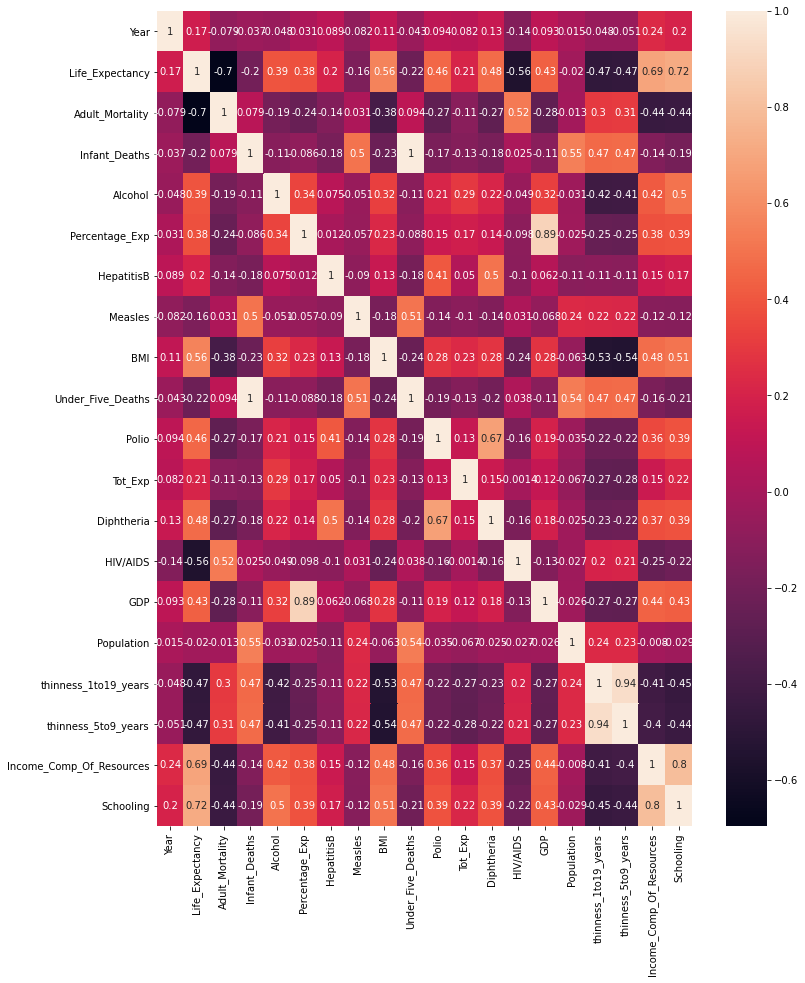

In [50]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

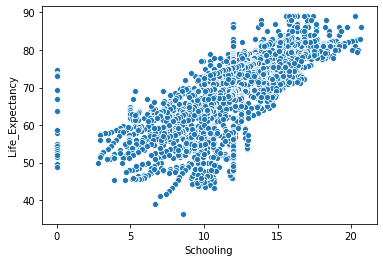

In [51]:
# 2. Data is linear
sns.scatterplot(df['Schooling'], df['Life_Expectancy'])
plt.show()

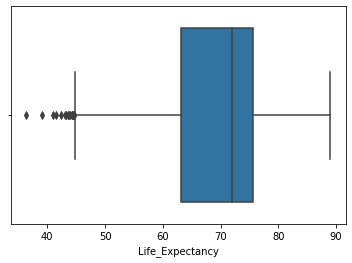

In [52]:
sns.boxplot(data=df, x="Life_Expectancy")
plt.show()

In [53]:
col={'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6, 
        'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10, 'Tot_Exp':11,'Diphtheria':12, 
     'HIV/AIDS':13,'GDP':14,'Population':15,
        'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

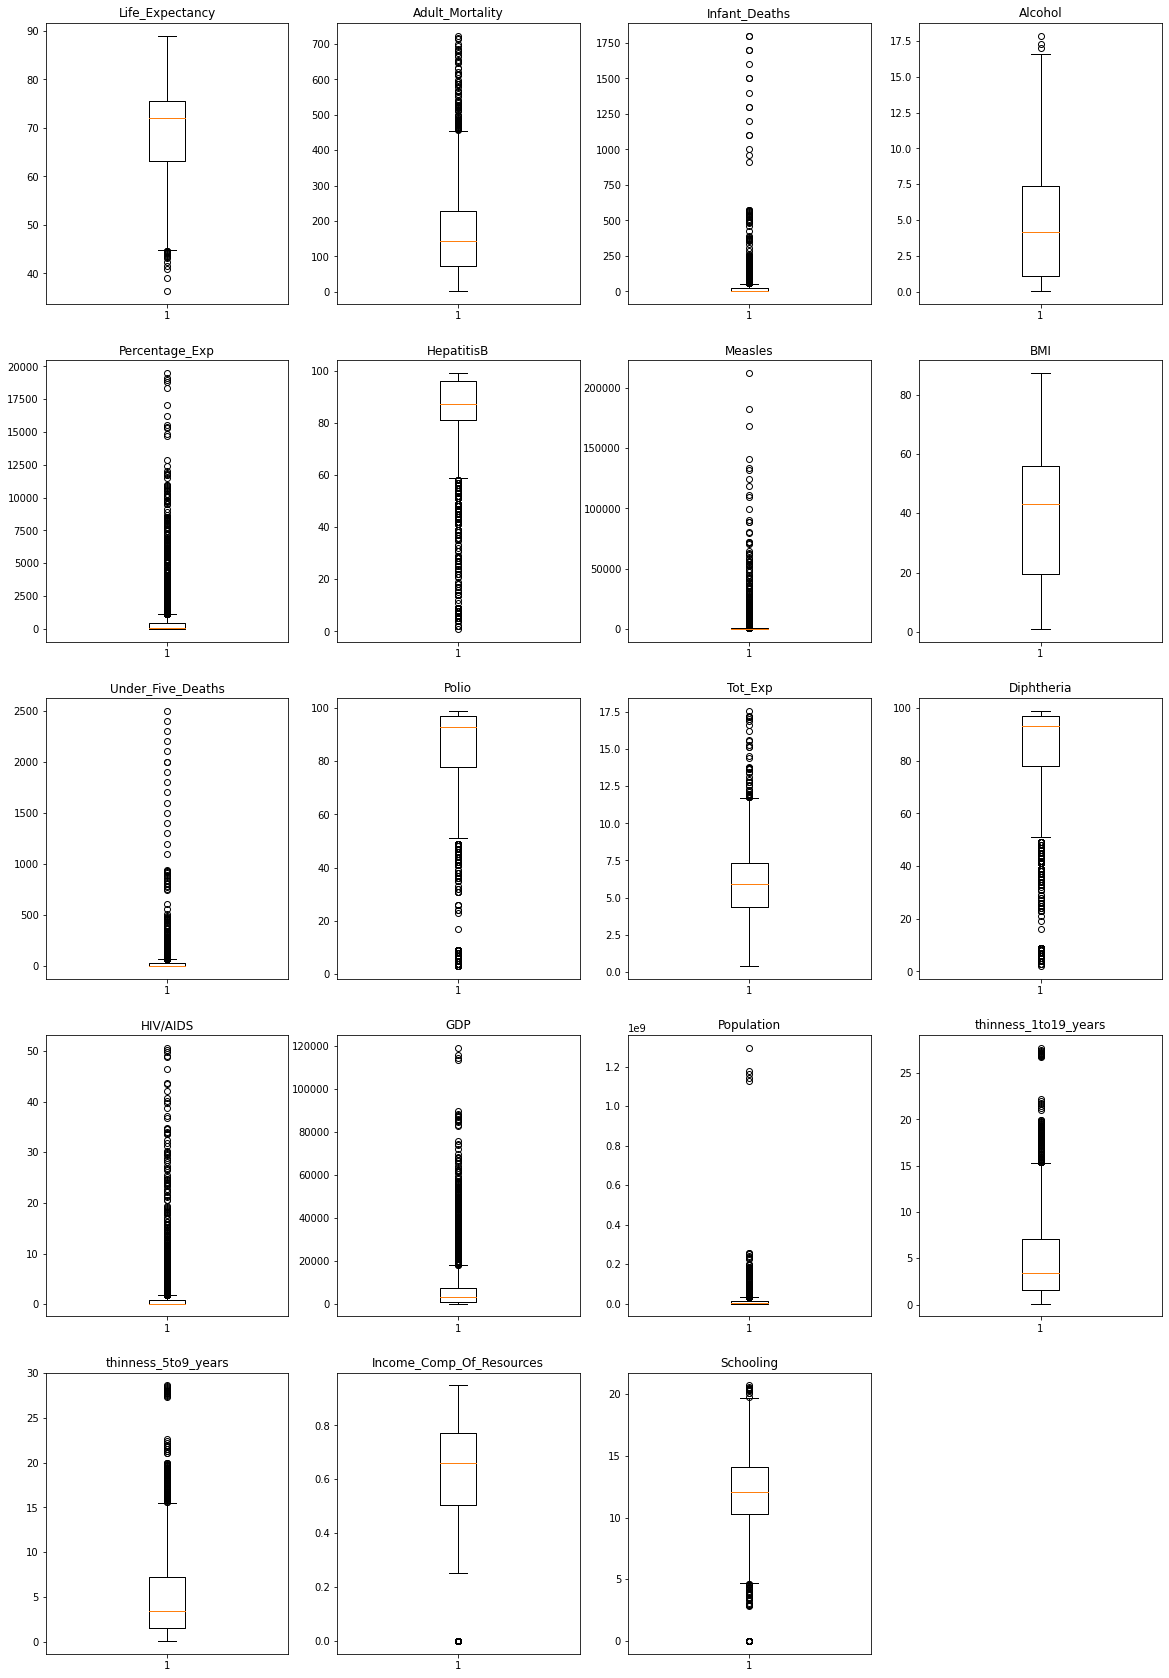

In [54]:
plt.figure(figsize=(20,30))

for variable,i in col.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

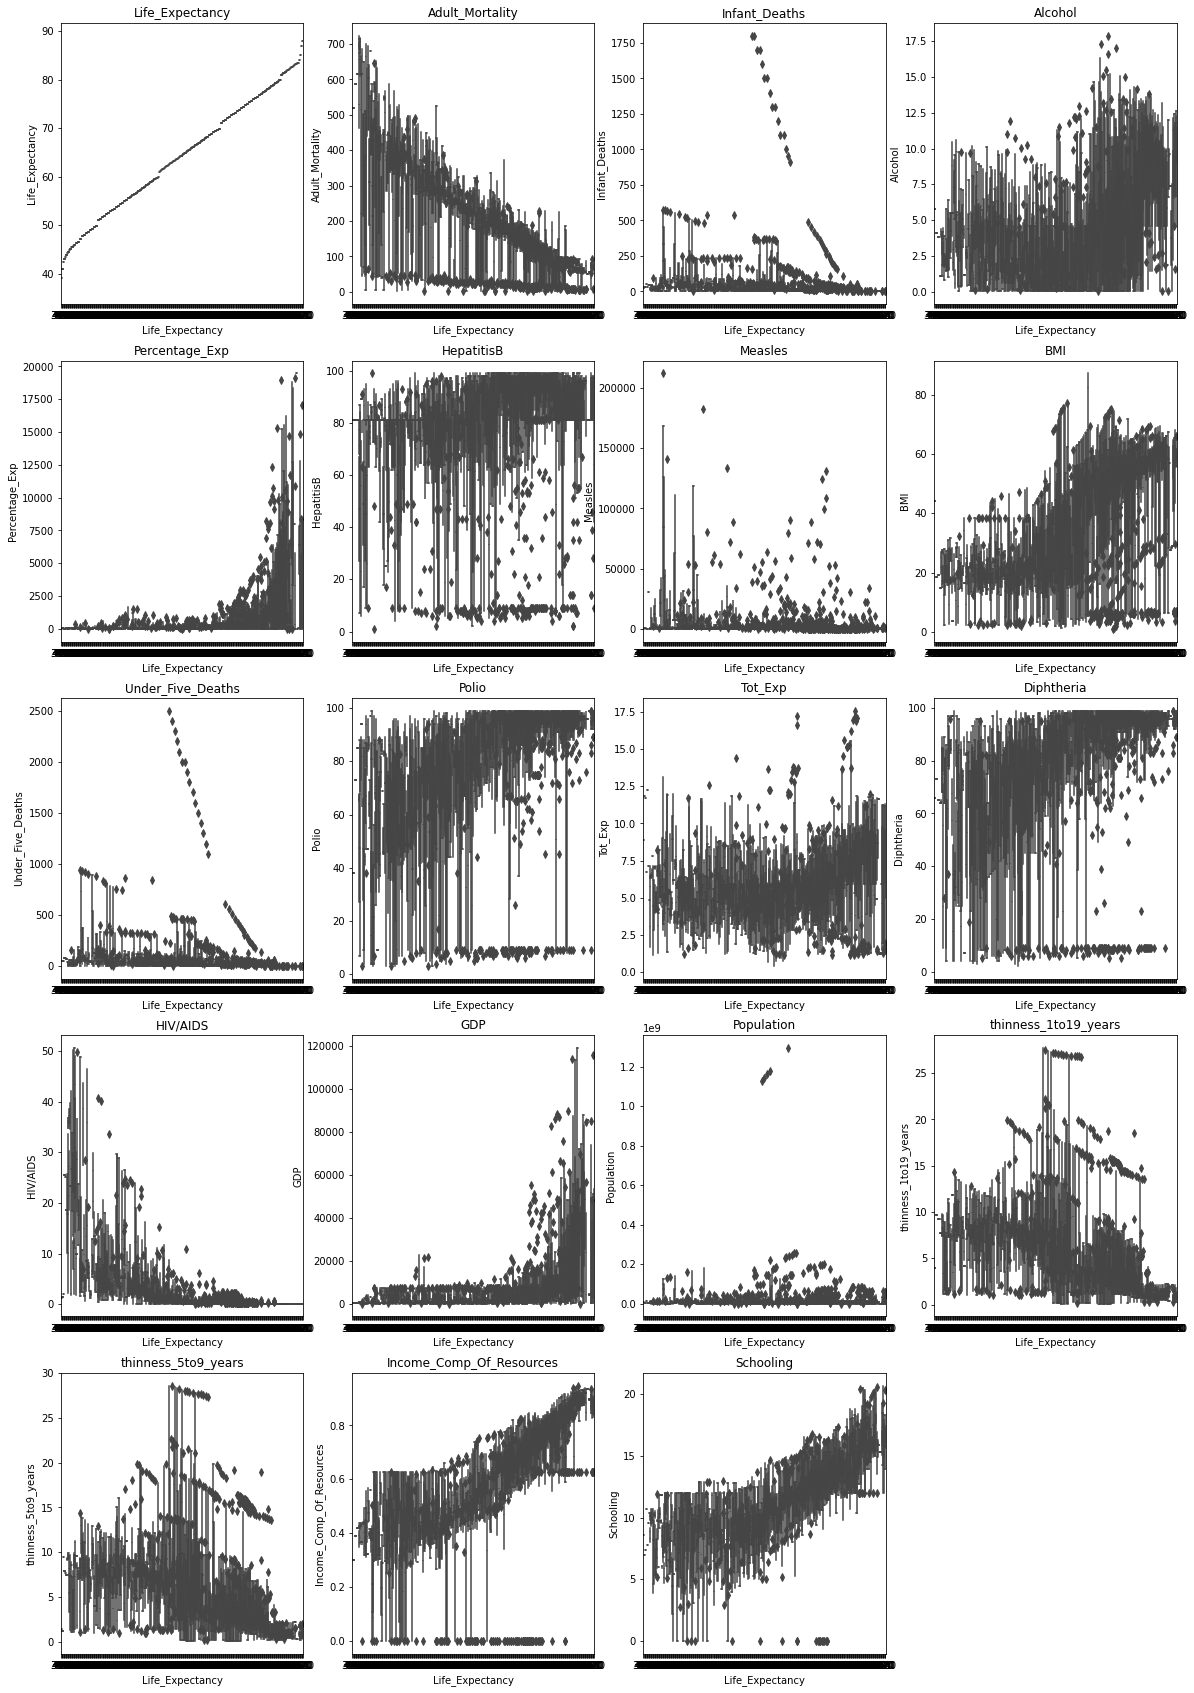

In [55]:
plt.figure(figsize=(20,30))

for variable,i in col.items():
                     plt.subplot(5,4,i)
                     sns.boxplot(y=df[variable], x=df['Life_Expectancy'])
                     plt.title(variable)
plt.show()

In [56]:
# Reducing Skewness
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

Year : -0.00640575475736738


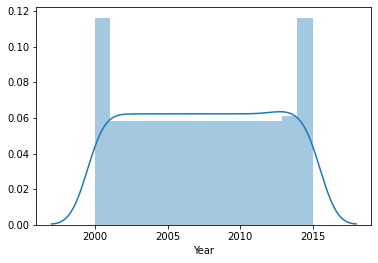

----------------------------
Life_Expectancy : -0.6393665610077625


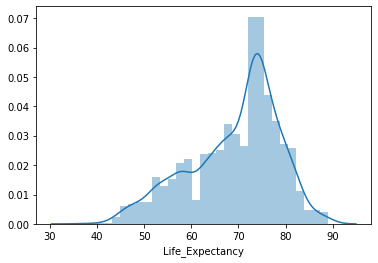

----------------------------
Adult_Mortality : 1.1757704547373102


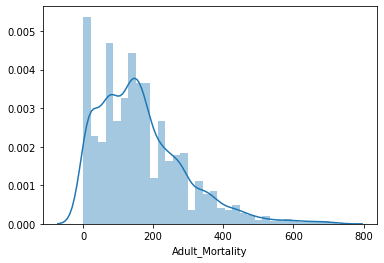

----------------------------
Infant_Deaths : 9.781965494027151


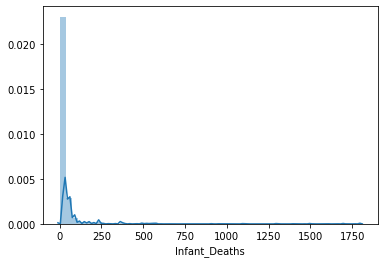

----------------------------
Alcohol : 0.6097140570154187


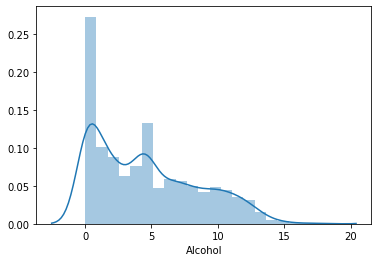

----------------------------
Percentage_Exp : 4.6496758996092895


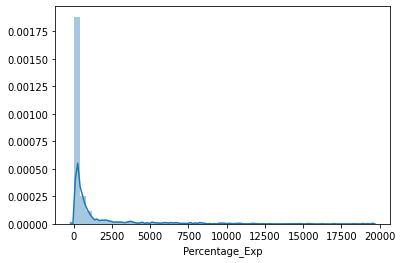

----------------------------
HepatitisB : -2.141686328571273


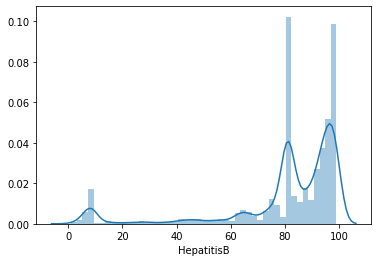

----------------------------
Measles : 9.436510978085607


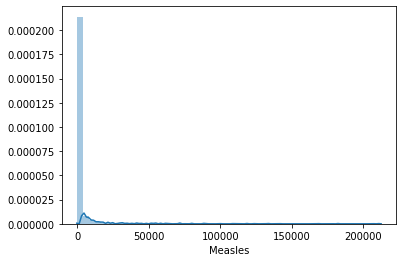

----------------------------
BMI : -0.22047775799960712


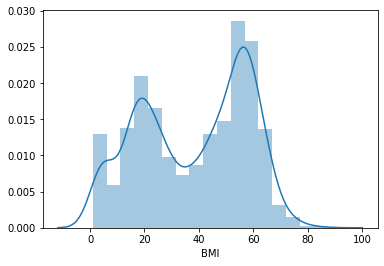

----------------------------
Under_Five_Deaths : 9.490216250784258


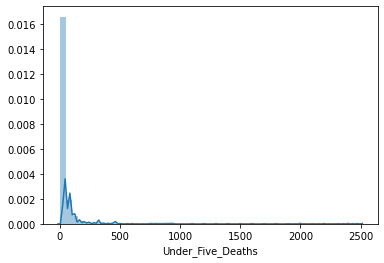

----------------------------
Polio : -2.1037885763846305


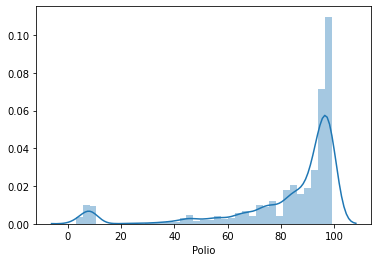

----------------------------
Tot_Exp : 0.6435921181946953


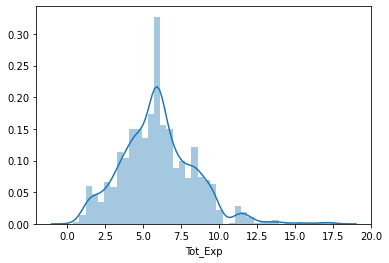

----------------------------
Diphtheria : -2.0784190946805627


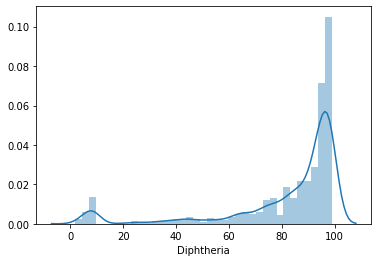

----------------------------
HIV/AIDS : 5.393356658787256


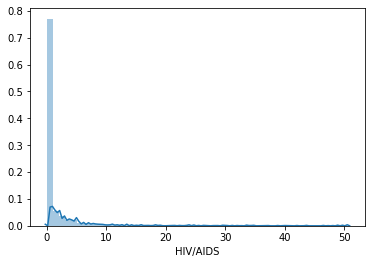

----------------------------
GDP : 3.4811015767906035


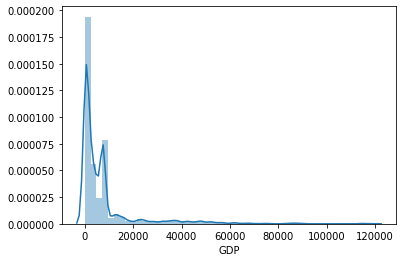

----------------------------
Population : 18.03196377189293


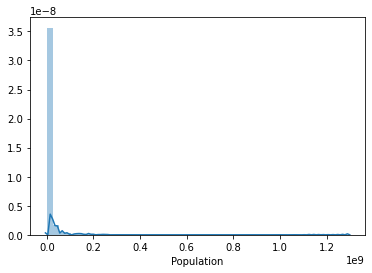

----------------------------
thinness_1to19_years : 1.7205715635042549


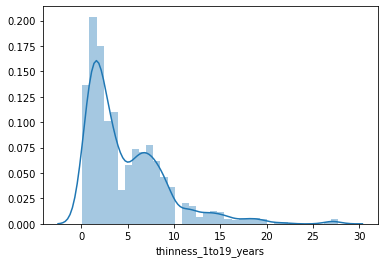

----------------------------
thinness_5to9_years : 1.7868751467593134


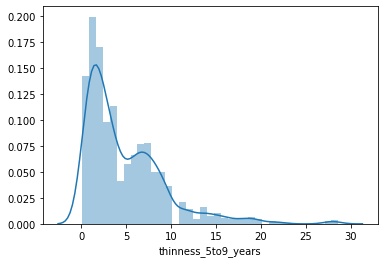

----------------------------
Income_Comp_Of_Resources : -1.1770864983488531


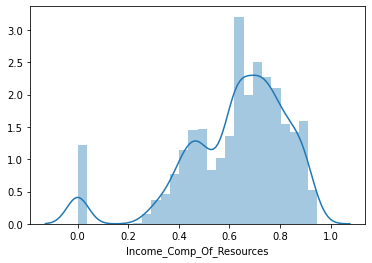

----------------------------
Schooling : -0.6195421469047607


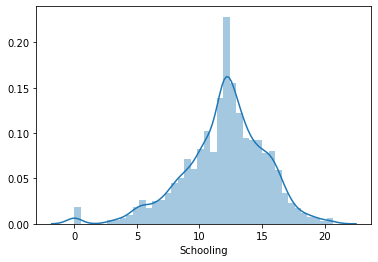

----------------------------


In [57]:
from scipy.stats import skew
for col in df_num:
  print(col, ":", skew(df_num[col]))
  sns.distplot(df_num[col])
  plt.show()
  print("----------------------------")

In [58]:
# Reducing skewness
df['Infant_Deaths'].min()

0

3.5838413153049844


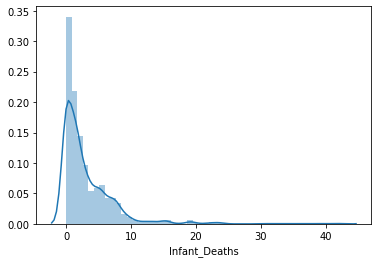

In [59]:
df_num['Infant_Deaths'] = np.sqrt(df_num['Infant_Deaths'])
print(skew(df_num['Infant_Deaths']))
sns.distplot(df_num['Infant_Deaths'])
plt.show()

-0.11374612183854879


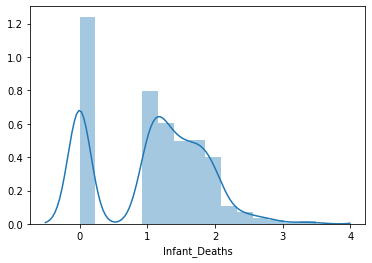

In [60]:
df_num['Infant_Deaths'] = np.cbrt(df_num['Infant_Deaths'])
print(skew(df_num['Infant_Deaths']))
sns.distplot(df_num['Infant_Deaths'])
plt.show()

In [61]:
df_num['Alcohol'].min()

0.01

-0.1750909685114634


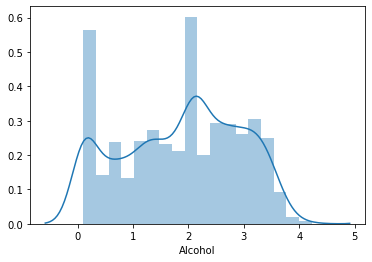

In [62]:
df_num['Alcohol'] = np.sqrt(df_num['Alcohol'])
print(skew(df_num['Alcohol']))
sns.distplot(df_num['Alcohol'])
plt.show()

In [63]:
df_num['Percentage_Exp'].min()

0.0

2.3556223469367197


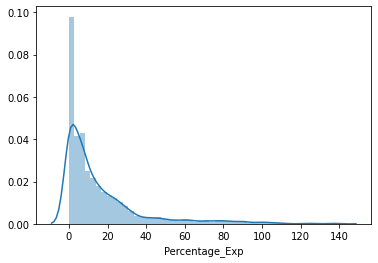

In [64]:
df_num['Percentage_Exp'] = np.sqrt(df_num['Percentage_Exp'])
print(skew(df_num['Percentage_Exp']))
sns.distplot(df_num['Percentage_Exp'])
plt.show()

-0.07308056487912896


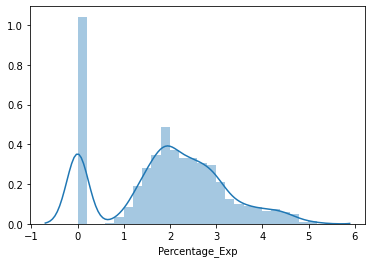

In [65]:
df_num['Percentage_Exp'] = np.cbrt(df_num['Percentage_Exp'])
print(skew(df_num['Percentage_Exp']))
sns.distplot(df_num['Percentage_Exp'])
plt.show()

In [66]:
df_num['Measles'].min()

0

4.170215101908666


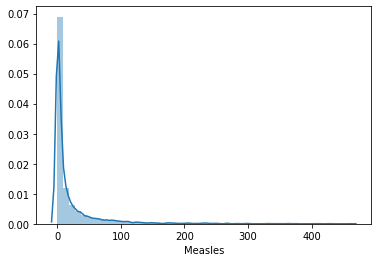

In [67]:
df_num['Measles'] = np.sqrt(df_num['Measles'])
print(skew(df_num['Measles']))
sns.distplot(df_num['Measles'])
plt.show()

0.738362707256634


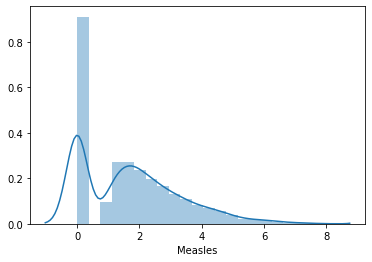

In [68]:
df_num['Measles'] = np.cbrt(df_num['Measles'])
print(skew(df_num['Measles']))
sns.distplot(df_num['Measles'])
plt.show()

In [69]:
df['Under_Five_Deaths'].min()

0

3.4906609235614265


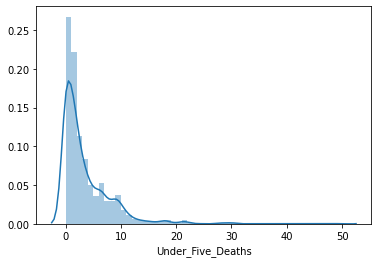

In [70]:
df_num['Under_Five_Deaths'] = np.sqrt(df_num['Under_Five_Deaths'])
print(skew(df_num['Under_Five_Deaths']))
sns.distplot(df_num['Under_Five_Deaths'])
plt.show()

-0.09502034815191451


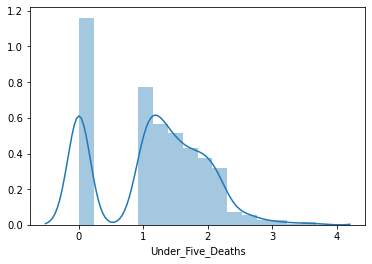

In [71]:
df_num['Under_Five_Deaths'] = np.cbrt(df_num['Under_Five_Deaths'])
print(skew(df_num['Under_Five_Deaths']))
sns.distplot(df_num['Under_Five_Deaths'])
plt.show()

In [72]:
df['Tot_Exp'].min()

0.37

-0.17909364278293452


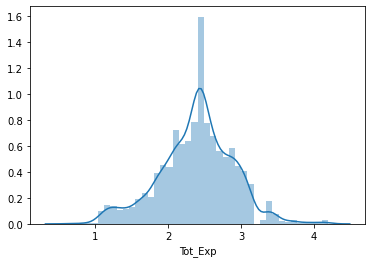

In [73]:
df_num['Tot_Exp'] = np.sqrt(df_num['Tot_Exp'])
print(skew(df_num['Tot_Exp']))
sns.distplot(df_num['Tot_Exp'])
plt.show()

In [74]:
df['GDP'].min()

1.68135

1.6089535912621775


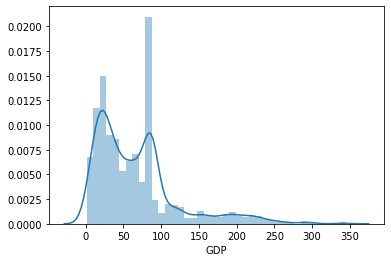

In [75]:
df_num['GDP'] = np.sqrt(df_num['GDP'])
print(skew(df_num['GDP']))
sns.distplot(df_num['GDP'])
plt.show()

0.263318700073741


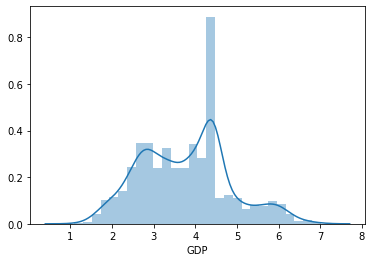

In [76]:
df_num['GDP'] = np.cbrt(df_num['GDP'])
print(skew(df_num['GDP']))
sns.distplot(df_num['GDP'])
plt.show()

In [77]:
df['Population'].min()

34.0

4.399232718140693


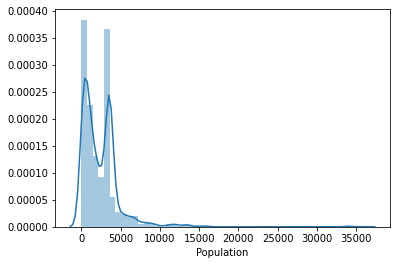

In [78]:
df_num['Population'] = np.sqrt(df_num['Population'])
print(skew(df_num['Population']))
sns.distplot(df_num['Population'])
plt.show()

0.13585061249682956


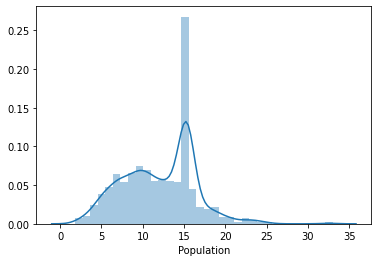

In [79]:
df_num['Population'] = np.cbrt(df_num['Population'])
print(skew(df_num['Population']))
sns.distplot(df_num['Population'])
plt.show()

In [80]:
df['thinness_1to19_years'].min()

0.1

0.6045995016250911


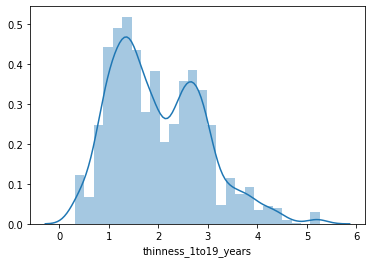

In [81]:
df_num['thinness_1to19_years'] = np.sqrt(df_num['thinness_1to19_years'])
print(skew(df_num['thinness_1to19_years']))
sns.distplot(df_num['thinness_1to19_years'])
plt.show()

-0.13842910765764374


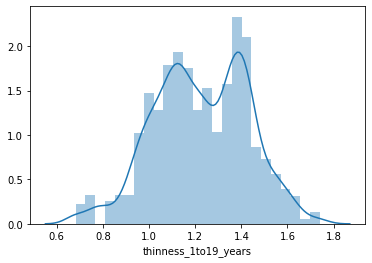

In [82]:
df_num['thinness_1to19_years'] = np.cbrt(df_num['thinness_1to19_years'])
print(skew(df_num['thinness_1to19_years']))
sns.distplot(df_num['thinness_1to19_years'])
plt.show()

In [83]:
df['thinness_5to9_years'].min()

0.1

0.6004453259046767


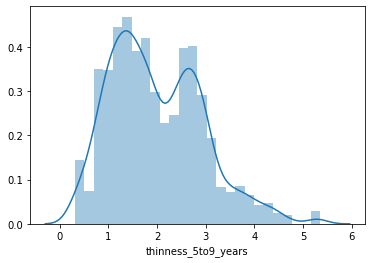

In [84]:
df_num['thinness_5to9_years'] = np.sqrt(df_num['thinness_5to9_years'])
print(skew(df_num['thinness_5to9_years']))
sns.distplot(df_num['thinness_5to9_years'])
plt.show()

-0.18699343838608887


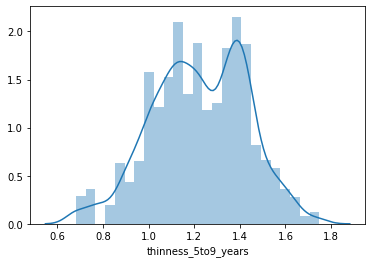

In [85]:
df_num['thinness_5to9_years'] = np.cbrt(df_num['thinness_5to9_years'])
print(skew(df_num['thinness_5to9_years']))
sns.distplot(df_num['thinness_5to9_years'])
plt.show()

In [86]:
df['HepatitisB'].min()

1.0

-2.69981153180898


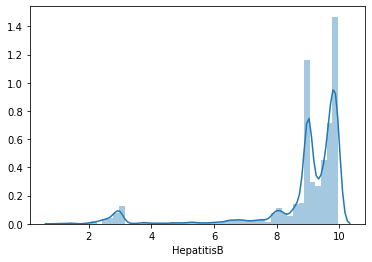

In [87]:
df_num['HepatitisB'] = np.sqrt(df_num['HepatitisB'])
print(skew(df_num['HepatitisB']))
sns.distplot(df_num['HepatitisB'])
plt.show()

-1.6632638712872274


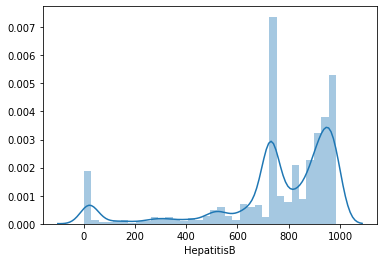

In [88]:
df_num['HepatitisB'] = np.power(df_num['HepatitisB'], 3)
print(skew(df_num['HepatitisB']))
sns.distplot(df_num['HepatitisB'])
plt.show()

-1.3491804177087454


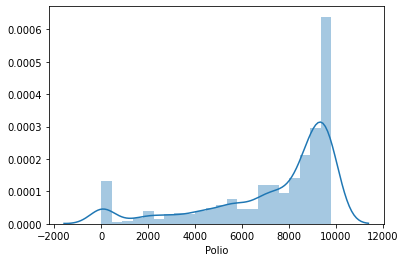

In [89]:
df_num['Polio'] = np.square(df_num['Polio'])
print(skew(df_num['Polio']))
sns.distplot(df_num['Polio'])
plt.show()

-0.38637901704306854


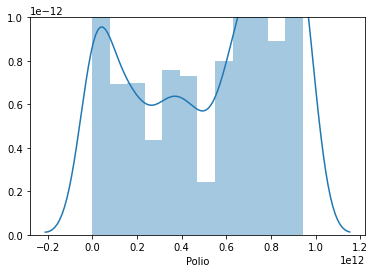

In [90]:
df_num['Polio'] = np.power(df_num['Polio'], 3)
print(skew(df_num['Polio']))
sns.distplot(df_num['Polio'])
plt.show()

In [91]:
df['Diphtheria'].min()

2.0

-1.366478849799013


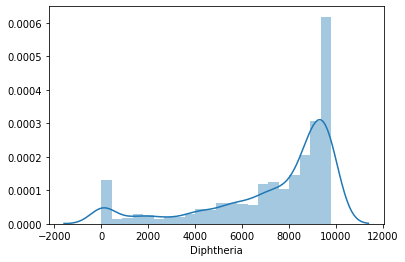

In [92]:
df_num['Diphtheria'] = np.square(df_num['Diphtheria'])
print(skew(df_num['Diphtheria']))
sns.distplot(df_num['Diphtheria'])
plt.show()

In [93]:
# df_num['Diphtheria'] = np.power(df_num['Diphtheria'], 3)
# print(skew(df_num['Diphtheria']))
# sns.distplot(df_num['Diphtheria'])
# plt.show()

In [94]:
# Handling Categorical Data
# Label encoding

from sklearn.preprocessing import LabelEncoder

for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()


Country  Status
0        0       1
1        0       1
2        0       1
3        0       1
4        0       1

In [95]:
# Scaling Data
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

Year  Life_Expectancy  Adult_Mortality  ...  Schooling  Country  Status
0  2015             65.0            263.0  ...       10.1        0       1
1  2014             59.9            271.0  ...       10.0        0       1
2  2013             59.9            268.0  ...        9.9        0       1
3  2012             59.5            272.0  ...        9.8        0       1
4  2011             59.2            275.0  ...        9.5        0       1

[5 rows x 22 columns]

In [96]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [98]:
for col in df_mm:
  mm = MinMaxScaler()
  df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

Year  Life_Expectancy  Adult_Mortality  ...  Schooling  Country  Status
0  1.000000         0.544592         0.362881  ...   0.487923      0.0     1.0
1  0.933333         0.447818         0.373961  ...   0.483092      0.0     1.0
2  0.866667         0.447818         0.369806  ...   0.478261      0.0     1.0
3  0.800000         0.440228         0.375346  ...   0.473430      0.0     1.0
4  0.733333         0.434535         0.379501  ...   0.458937      0.0     1.0

[5 rows x 22 columns]

In [99]:
for col in df_ss:
  ss = StandardScaler()
  df_ss[col] = ss.fit_transform(df_ss[[col]])
df_ss.head()

Year  Life_Expectancy  Adult_Mortality  ...  Schooling   Country    Status
0  1.621762        -0.444448         0.791586  ...  -0.579931 -1.691042  0.459399
1  1.404986        -0.980950         0.856072  ...  -0.610570 -1.691042  0.459399
2  1.188210        -0.980950         0.831890  ...  -0.641209 -1.691042  0.459399
3  0.971434        -1.023029         0.864132  ...  -0.671847 -1.691042  0.459399
4  0.754658        -1.054587         0.888314  ...  -0.763764 -1.691042  0.459399

[5 rows x 22 columns]

In [100]:
# Implement Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = df_new[['Schooling']]
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)

residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [2.10350447]
Intercept =  43.9731069863436


0.4980532082910134

In [101]:
x = df_mm[['Schooling']]
y = df_mm['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)

residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [0.82640852]
Intercept =  0.14618355214904039


0.4716199952747334

In [102]:
x = df_ss[['Schooling']]
y = df_ss['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)

residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [0.73026095]
Intercept =  -0.007887863178982839


0.4895324596896615

In [104]:
x = df_new.drop('Life_Expectancy', axis=1)
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)

residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [ 3.25251257e-02 -1.74728033e-02  2.85226921e+00  1.25723678e-01
  3.22744828e-01 -2.42702573e-03 -1.56115601e-01  2.26613978e-02
 -3.89711849e+00  2.97168771e-12  4.06915211e-01  4.26180155e-04
 -4.65554946e-01  3.57339638e-01  4.45107901e-02 -6.90640630e-02
 -2.39783318e+00  6.85904289e+00  5.06805894e-01  4.39845236e-03
 -1.24299177e+00]
Intercept =  -4.894485223544507


0.8055575234015673

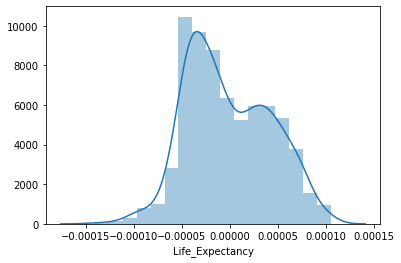

In [110]:
sns.distplot(residuals)
plt.show()

In [103]:
# Select new features
df_new.corr()

Year  Life_Expectancy  ...   Country    Status
Year                      1.000000         0.169623  ...  0.001342  0.001864
Life_Expectancy           0.169623         1.000000  ... -0.016745 -0.481962
Adult_Mortality          -0.078861        -0.696359  ...  0.039760  0.315171
Infant_Deaths            -0.054826        -0.553654  ...  0.018564  0.381049
Alcohol                  -0.068912         0.358970  ... -0.046248 -0.503514
Percentage_Exp           -0.090164         0.348273  ... -0.111891 -0.309740
HepatitisB                0.109436         0.236902  ... -0.023769 -0.098287
Measles                  -0.115394        -0.313660  ...  0.044957  0.061634
BMI                       0.108327         0.559255  ...  0.017724 -0.310873
Under_Five_Deaths        -0.052183        -0.573187  ...  0.006459  0.376377
Polio                     0.115013         0.587781  ... -0.011499 -0.278239
Tot_Exp                   0.076199         0.185219  ...  0.040129 -0.252963
Diphtheria                0.144767         0.550633  ... -0.010517 -0.255523
HIV/AIDS                 -0.139741        -0.556457  ...  0.090206  0.148590
GDP                       0.144547         0.537364  ... -0.018135 -0.420771
Population                0.042626        -0.029319  ...  0.013440  0.050693
thinness_1to19_years     -0.037835        -0.538802  ... -0.000312  0.458983
thinness_5to9_years      -0.038480        -0.543415  ...  0.007697  0.466005
Income_Comp_Of_Resources  0.236333         0.692483  ... -0.023600 -0.457302
Schooling                 0.203471         0.715066  ... -0.025217 -0.491444
Country                   0.001342        -0.016745  ...  1.000000 -0.031635
Status                    0.001864        -0.481962  ... -0.031635  1.000000

[22 rows x 22 columns]

In [108]:
# Select factors with decent correlation
x = df_new.drop(['Country', 'Population'], axis=1)
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

Intercept = -0.00045295309497817016 
 Slope = [ 2.66047160e-07  9.99998694e-01 -3.32654727e-08  8.79693718e-07
 -1.92989188e-06 -7.99667140e-08 -8.69219422e-08  1.89668171e-07
 -4.77104740e-09 -5.96509835e-06  1.66971649e-16 -4.76857283e-16
  5.59927957e-18 -4.28135807e-16 -1.95756385e-16 -3.38829164e-16
  1.27909249e-16  1.22310826e-15 -3.73238737e-16  1.61652385e-16]
MSE = 1.926141624287599e-09 
 R2 = 0.9999999999778586


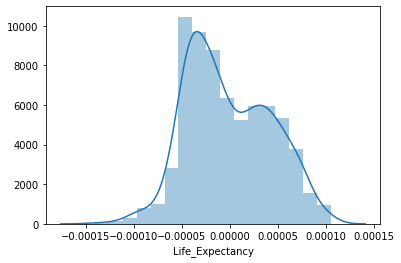

In [109]:
sns.distplot(residuals)
plt.show()

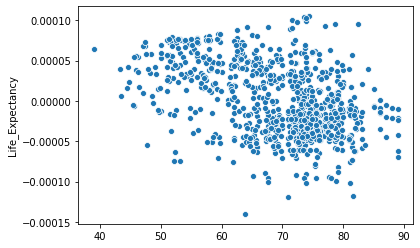

In [111]:
sns.scatterplot(y_hat, residuals)
plt.show()

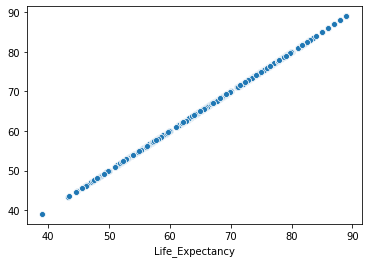

In [112]:
sns.scatterplot(y_test, y_hat)
plt.show()

In [113]:
df_new['thinness'] = (df['thinness_1to19_years'] + df['thinness_5to9_years'])/2

In [118]:
x = df_new[['Adult_Mortality','Infant_Deaths','Alcohol','Percentage_Exp','Measles','BMI','Under_Five_Deaths','Polio','Diphtheria','HIV/AIDS','GDP','thinness','Income_Comp_Of_Resources','Schooling','Status']]
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

Intercept = 57.51205627515226 
 Slope = [-1.79949874e-02  3.23279162e+00  1.77576048e-01  2.71044443e-01
 -5.11346013e-02  3.99055632e-02 -4.20600202e+00  2.36699549e-12
  3.78570938e-04 -4.71875411e-01  4.36023642e-01 -3.39479756e-02
  6.11897493e+00  5.42230420e-01 -1.65617382e+00]
MSE = 16.61218034380898 
 R2 = 0.8090396063230164


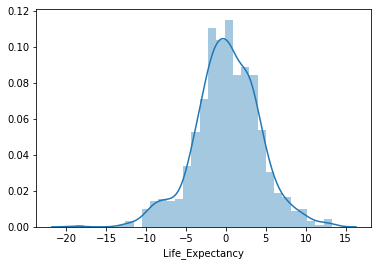

In [119]:
sns.distplot(residuals)
plt.show()

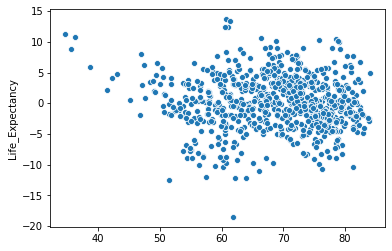

In [122]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [120]:
x = df_new[['Adult_Mortality','Infant_Deaths','BMI','Under_Five_Deaths','Polio','Diphtheria','HIV/AIDS','GDP','thinness','Income_Comp_Of_Resources','Schooling','Status']]
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

Intercept = 58.02711931830228 
 Slope = [-1.81983888e-02  3.15096756e+00  3.97138589e-02 -4.23615891e+00
  2.31326069e-12  3.88304168e-04 -4.59499372e-01  5.08713224e-01
 -4.66356488e-02  6.12029739e+00  5.67154325e-01 -1.85342103e+00]
MSE = 16.764248473178224 
 R2 = 0.8072915522296298


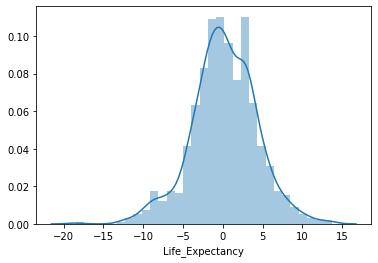

In [121]:
sns.distplot(residuals)
plt.show()

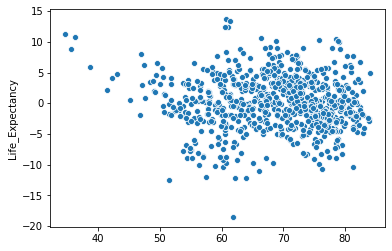

In [123]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [124]:
x = df_new[['Status', 'Infant_Deaths', 'Under_Five_Deaths', 'HIV/AIDS', 'Schooling', 'Income_Comp_Of_Resources']]
y = df_new['Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

Intercept = 58.3857250003622 
 Slope = [-2.58211283  3.54654092 -5.90864604 -0.70422684  0.86083768 10.92028807]
MSE = 22.79824216704074 
 R2 = 0.7379295667841825


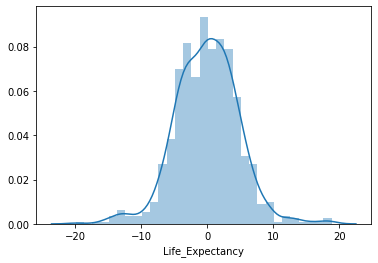

In [125]:
sns.distplot(residuals)
plt.show()

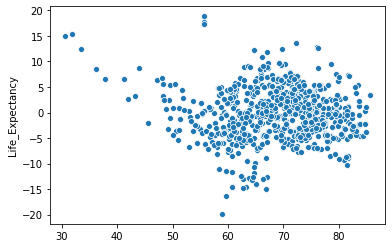

In [126]:
sns.scatterplot(y_hat, residuals)
plt.show()

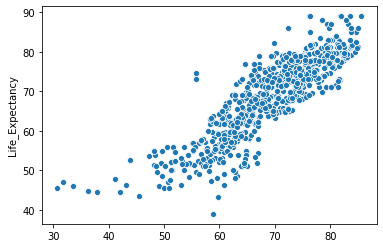

In [128]:
sns.scatterplot(y_hat, y_test)
plt.show()

In [129]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x = df_new.drop(['Country','Life_Expectancy'], axis=1)
y = df_new['Life_Expectancy']
pf = PolynomialFeatures(2) #Degree 2, theta0, x0, x1,x2
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 30.462787970433574 
 R2 = 0.6790031659500824


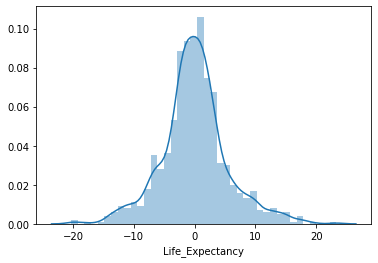

In [130]:
sns.distplot(residuals)
plt.show()

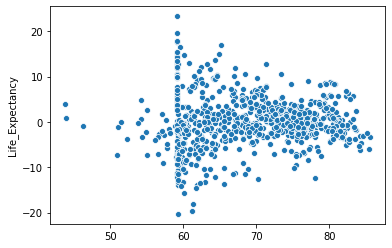

In [131]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [132]:
# Final model
x = df_new.drop(['Country','Life_Expectancy'], axis=1)
y = df_new['Life_Expectancy']
pf = PolynomialFeatures(3) #Degree 3
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 35.786348495325846 
 R2 = 0.6049461634606875


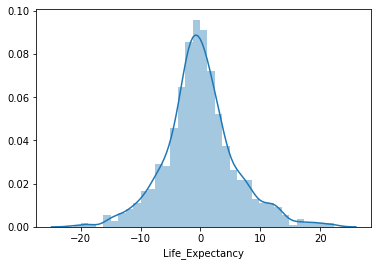

In [133]:
# Residuals are normally distributed
sns.distplot(residuals)
plt.show()

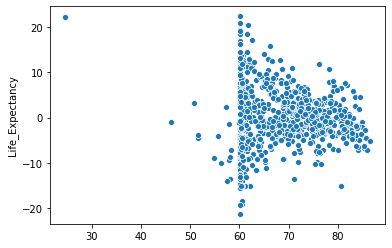

In [134]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [145]:
x = df_new[['Adult_Mortality','Infant_Deaths','Alcohol','Percentage_Exp','Measles','BMI','Under_Five_Deaths','Polio','Diphtheria','HIV/AIDS','GDP','thinness','Income_Comp_Of_Resources','Schooling','Status']]
y = df_new['Life_Expectancy']
pf = PolynomialFeatures(2) #Degree 3
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 27.989177146188073 
 R2 = 0.6936647760146082


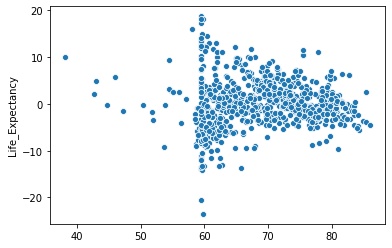

In [143]:
sns.scatterplot(y_hat, residuals)
plt.show()

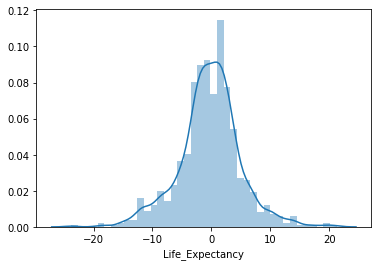

In [146]:
sns.distplot(residuals)
plt.show()